In [1]:
from IPython.display import Image

# Assignments and Memory

### 들어가기

- 이해를 못해도 추후 Datacamp 강좌를 듣고 실습하는데 아무 문제 X
- 나중에 시행착오를 조금이라도 줄이거나, 파이썬에서의 메모리 이해룰 조금이라도 늘리기 위해
- 잘못 이해해서 틀린 내용이 나올 가능성 충분
- 시각적으로 메모리영역을 나타낸 자료를 포함한 다른 강의나 포스팅을 추후에 더 보는 것 추천

### Lecutre

Manipulating Lists

https://campus.datacamp.com/courses/intro-to-python-for-data-science/chapter-2-python-lists?ex=12

위 강좌 2분 10초경 부터 보면 다음 장면들이 나온다.

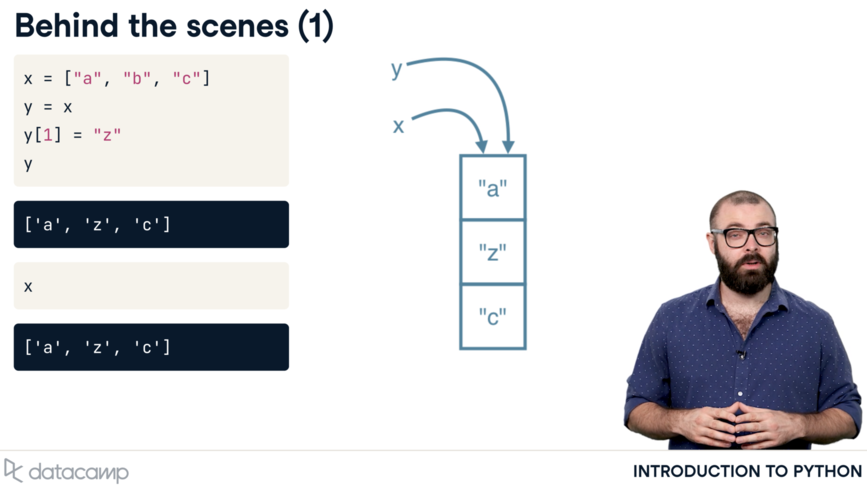

In [2]:
Image("../imgs/week1_1.png")

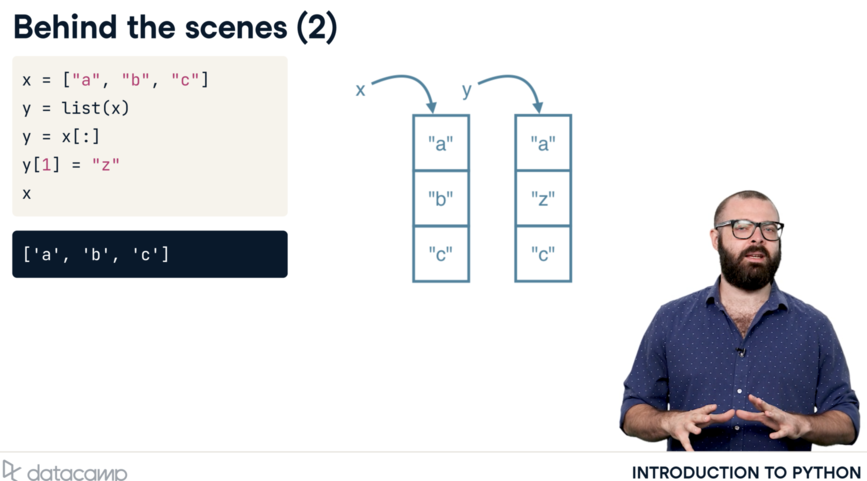

In [3]:
Image("../imgs/week1_2.png")

### Assignment

**정의**

단순 할당 연산자 (=)만 가지고 하는 연산. `b = a`

-> a를 b라고도 부르겠다, b는 a의 또다른 이름이다.

- 변수를 대입(assignment)하는 과정이 '복사'를 하는 것이 아니라 '**참조**'를 하는 과정임.

- 그저 해당하는 메모리에 이름이 하나 더 생긴 것. (reference)



### 메모리영역 확인
**한 메모리를 부르는 이름의 개수 확인**

In [4]:
#getrefcount == get_reference_count == 레퍼런스(이름)의 개수를 세어줌
import sys
a = ['a','b','c']
print(sys.getrefcount(a))
b = a
print(sys.getrefcount(a))
b = list(a[:])
print(sys.getrefcount(a))

2
3
2


### Id()

In [5]:
# python help
help(id)

Help on built-in function id in module builtins:

id(obj, /)
    Return the identity of an object.
    
    This is guaranteed to be unique among simultaneously existing objects.
    (CPython uses the object's memory address.)



In [6]:
x = ["a", "b", "c"]
print(id(x))

4567518528


In [7]:
# x라는 이름 말고도 y라는 이름으로 부를래!
y = x
print(id(y))

4567518528


In [8]:
# 리스트의 요소하나를 바꾸어도, 리스트 전체의 주소가 변하진 않음
y[1] = "z"
print(id(x))
print(id(y))
print(x)

4567518528
4567518528
['a', 'z', 'c']


### copy
단일 할당 연산자(=)만 쓰이지 않음

In [9]:
# list(x[:])는 x와 같은 값을 복사한 것임
print(id(x))
print(id(list(x)))

4567518528
4568505664


In [10]:
# 다른 방법들
print(id(x[:]))
print(id(x.copy))

import copy as cp
print(id(cp.copy(x)))

4567844928
4567646992
4567836352


In [11]:
# x와 값이 동일하지만 다른 (실제로 다른 메모리에 따로 저장된) 리스트를 만들고 y라 부를래!
y = list(x) # x[:], x.copy() 다른 방법들
print(id(x))
print(id(y))

4567518528
4568705472


모든 자료형이 위와 같은 assignment와 copy가 있는건가?

    -> List가 Mutable한 변수이기 때문에 해당. Immutable한 변수들은 애초에 값이 변경이 안 됨

### Mutable

**정의**

값을 변경할 수 있는 자료형.

In [12]:
# immutable한 자료형인 tuple의 값을 변경하려고 시도
a = (3, 4)
a[0] = 1

TypeError: 'tuple' object does not support item assignment

Mutable - 리스트, 딕셔너리, numpy의 배열

Immutable - 숫자, 문자열, 튜플

copy 대신 할당을 하면 어떤 문제가 생길까?

    -> Mutable(값을 변경할 수 있는) 자료형을 다룰 때 문제가 됨.

### Mutable한 자료형을 쓸 때 할당을 복사로 오해시 발생하는 문제

이런 문제가 있을 수 있지 않을까?하는 저의 상상입니다.

우리에게 머신러닝 모델의 파라미터를 조정한다고 가정

In [13]:
# 치킨집의 치킨 판매량 예측
data_columns = ['날짜', '요일', '계절', '날씨', '스포츠경기', '개학일']

# data중에서 연관 있을거라 생각하는 것들 선별
a = ['계절', '날씨', '스포츠경기']

# 테스트를 해봄
# ...

# 스포츠경기보다는 근처 학교 개학일이 영향을 주지 않을까?
a_test = a # copy라고 생각하고 test를 만들었지만, 사실은 assignment
a_test[a.index('스포츠경기')] = '개학일'

# a_test로 테스트를 마쳤다고 가정

# 테스트를 해봤는데 소득이 없네.. 원래 a로 돌아와야겠다
print(a)

['계절', '날씨', '개학일']


지금은 쉽게 티가나지만, 자료형이 더 복잡하고, 요인들로 생각하는 값들이 더 많다면?

### assignment 인것과 아닌것.

**Is assignment,**

    - a = b
    - a = b (+,-,*,..) c
        - ex) a = b + c, a = a + b
    - 함수의 매개변수

**Not assignment**

    - 특정 내장함수(append 함수, copy 함수)
    - copy.copy(변수)
    - 슬라이싱
        * ex) a = b[:]
    - a (+,-,*..)= c
        * ex) a += b

In [14]:
#예외 사항

x = [1,2,3]
print('type of x', type(x))
print('Id before assignment', id(x))
x = x * 2
print('Id After assignment', id(x))
print(x)

type of x <class 'list'>
Id before assignment 4567836352
Id After assignment 4567850624
[1, 2, 3, 1, 2, 3]


In [15]:
x = [1,2,3]
print('type of x', type(x))
print('Id before assignment', id(x))
x *= 2
print('Id After assignment', id(x))
print(x)

type of x <class 'list'>
Id before assignment 4568761088
Id After assignment 4568761088
[1, 2, 3, 1, 2, 3]


### pass by assignment

함수의 매개변수로 넘어갈 때, 함수 내부에 새로운 변수를 할당하는 것임

In [16]:
# Immutable parameter
def twice(x):
    x *= 2

x = 'hello'
twice(x)
print(x)

hello


In [17]:
def twice(x):
    print('In func, id of "x" is', id(x))
    x *= 2
    print('After assignment, id of "x" is', id(x))

In [18]:
x = 'hello'
twice(x)
print('id of "x" is', id(x))

In func, id of "x" is 4562556336
After assignment, id of "x" is 4568692912
id of "x" is 4562556336


In [19]:
# Mutable Parameter

x = ['1', '2', '3']
print('Before func, id of "x" is', id(x))
twice(x)
print('After func, id of "x" is', id(x))
print('The value x is', x)

Before func, id of "x" is 4568670400
In func, id of "x" is 4568670400
After assignment, id of "x" is 4568670400
After func, id of "x" is 4568670400
The value x is ['1', '2', '3', '1', '2', '3']


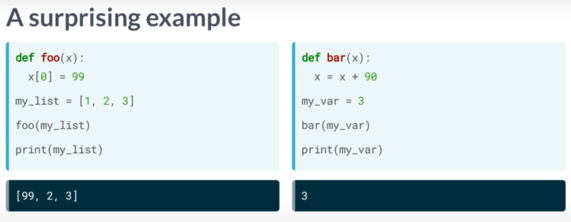

In [20]:
Image("../imgs/week1_3.png")

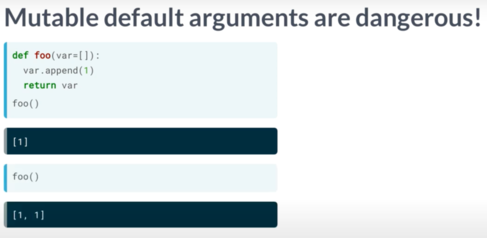

In [21]:
Image("../imgs/week1_4.png")

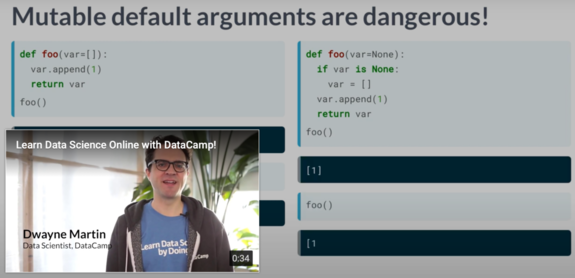

In [22]:
Image("../imgs/week1_5.png")

### 파이썬의 리터럴 상수
**리스트 내부 값의 주소**

In [23]:
z = ["a", "b", "c"]
print(id(x[0]), id(x[1]), id(x[2]))
print(id(y[0]), id(y[1]), id(y[2]))
print(id(z[0]), id(z[1]), id(z[2]))

4528863984 4529315440 4529315504
4528220528 4529362224 4527652592
4528220528 4527778032 4527652592


### 리스트 안에 또 리스트

In [24]:
a = [[1,2,3],(4,5),6]

# a와 값이 동일하지만, 엄연히 다른 새로운 변수의 이름 b
b = a[:]
print(id(a))
print(id(b))

4568691840
4568596288


In [25]:
# 내부 리스트는 이름이 같음!
print(id(a[0]), id(a[1]), id(a[2]))
print(id(b[0]), id(b[1]), id(b[2]))

4567850624 4566709504 4525759376
4567850624 4566709504 4525759376


**리스트 안의 리스트 값 변경해보기**

In [26]:
a[0][0] = 4
print(id(a[0]))
print(id(b[0]))
print(a)
print(b)

4567850624
4567850624
[[4, 2, 3], (4, 5), 6]
[[4, 2, 3], (4, 5), 6]


### copy면 독립적인가?

In [27]:
a = [[1,2,3],[4,5,6]]
b = a.copy()

b[0][0] = 7
print(a)

[[7, 2, 3], [4, 5, 6]]


### copy와 deepcopy

copy는 객체에 포함된 레퍼런스가 가르키는 값을 복사하지는 않음 (얕은 복사, shallow copy)

In [28]:
#import copy 위에서 이미함
x = [[1,2,3],[4,5,6],[7,8,9]]
def is_same_id(a, b):
    if id(a) == id(b):
        print('메모리 주소(id)가 같습니다.')
    else:
        print('메모리 주소(id)가 다릅니다.')

In [29]:
a = x
is_same_id(x, a)
is_same_id(x[0], a[0])

메모리 주소(id)가 같습니다.
메모리 주소(id)가 같습니다.


In [30]:
b = cp.copy(x) # x.copy(), x[:]
is_same_id(x, b)
is_same_id(x[0], b[0])

메모리 주소(id)가 다릅니다.
메모리 주소(id)가 같습니다.


In [31]:
c = cp.deepcopy(x)
is_same_id(x, c)
is_same_id(x[0], c[0])

메모리 주소(id)가 다릅니다.
메모리 주소(id)가 다릅니다.


# 레퍼런스

### Datacamp Youtube
[Python Tutorial: Pass by assignment](https://www.youtube.com/watch?v=m8YbXbcFLNc)


### Blog
[Deep copy & Shallow copy](https://engkimbs.tistory.com/667)